# Project 1 Progress Report
## Goal
Our goal is to accurately predict if a person will file an insurance claim within the next year.  To do so, we will utilize various machine learning tools and methods that have been covered in class, as well as some that were not.
## Plan
Our plan can be broken into three distinct stages: data cleanup, data exploration, and machine learning application.  The data cleanup stage is primarily concerned with removing missing data, represented by -1 in this case.  Since every feature is of the form binary, categorical, or continuous, each feature must be cleaned with a different method.  Missing numbers within the features represented by real numbers will likely be replaced by the average of the remaining numbers.  Categorical and binary features will instead use either the mode or median of the set, depending on which works better.  We will also perform tests where the features that are missing data are dropped from the data set to see if the missing data represents something important.
Once the data has been cleaned, we will begin to explore the data.  We plan to visualize the relationships between features with various graphs.  After observing the results of the exploration, we will begin to test different machine learning methods on the data sets.
## What we have done so far
We have processed a majority of the data and split the data set into three groups.  Each data set can now be used with various machine learning methods.  We have also have decided on what we want to do with each type of data, whether it be categorical, numerical and binary. We have also tested out some classifiers and showed their accuracy.
## What we plan to do next
Our plan for next week is to finish the data exploration and find a way to predict an event that comprises only three percent of the total data set.
## What we have learned
- Laura:
    I learned to use what I know about different types of data manipulation onto different types of data that need different strategies.
- Brandon:
    So far I have learned various methods for dealing with missing data.  Additionally, I have learned that if 97% of the target variable is zero, then a prediction of zero will be correct 97% of the time.


In [64]:
import numpy as np
from pandas import read_csv
import pandas as pd
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.preprocessing import Imputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [65]:
## Data Preparation
dat = read_csv("data/train.csv")
## With and without the -1, because it could be of significance.
count_nan = len(dat) - dat.count()
print("Number of NaNs", count_nan)
## There are no null values that need to be dealt with
## Make a different copy of the data to see if the -1s have a significance

Number of NaNs id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_ca

In [66]:
## Information about the data ##
## bin to indicate binary features
## cat to indicate categorical features
## without; either continuous or ordinal
X = dat.loc[:, dat.columns != "target"]
y = dat.loc[:, "target"]

print("Values of target", y.unique())
print("Number of 1:", sum(y == 1), "Percentage of dataset:", sum(y==1)/len(y)*100, "%")
print("Number of 0:", sum(y == 0), "Percentage of dataset:", sum(y==0)/len(y)*100, "%")
for i in X.columns:
    print(i, dat.loc[:, i].unique())
print("We can see that all the categorical columns are numbers.")

Values of target [0 1]
Number of 1: 21694 Percentage of dataset: 3.64475178592 %
Number of 0: 573518 Percentage of dataset: 96.3552482141 %
id [      7       9      13 ..., 1488017 1488021 1488027]
ps_ind_01 [2 1 5 0 4 3 6 7]
ps_ind_02_cat [ 2  1  4  3 -1]
ps_ind_03 [ 5  7  9  2  0  4  3  1 11  6  8 10]
ps_ind_04_cat [ 1  0 -1]
ps_ind_05_cat [ 0  1  4  3  6  5 -1  2]
ps_ind_06_bin [0 1]
ps_ind_07_bin [1 0]
ps_ind_08_bin [0 1]
ps_ind_09_bin [0 1]
ps_ind_10_bin [0 1]
ps_ind_11_bin [0 1]
ps_ind_12_bin [0 1]
ps_ind_13_bin [0 1]
ps_ind_14 [0 1 2 3 4]
ps_ind_15 [11  3 12  8  9  6 13  4 10  5  7  2  0  1]
ps_ind_16_bin [0 1]
ps_ind_17_bin [1 0]
ps_ind_18_bin [0 1]
ps_reg_01 [ 0.7  0.8  0.   0.9  0.6  0.5  0.4  0.3  0.2  0.1]
ps_reg_02 [ 0.2  0.4  0.   0.6  1.8  0.1  0.7  1.4  0.9  0.3  0.5  0.8  1.   1.3  1.6
  1.5  1.2  1.1  1.7]
ps_reg_03 [ 0.71807033  0.76607767 -1.         ...,  1.60078106  1.63075903
  1.74355958]
ps_car_01_cat [10 11  7  6  9  5  4  8  3  0  2  1 -1]
ps_car_02_cat [ 1  

In [67]:
## Transforming the -1
X_no_neg = X
y_no_neg = y
cat = pd.DataFrame()
bn = pd.DataFrame()
norm = pd.DataFrame()
for i in X.columns:
    if "cat" in i:
        # Transform Median
        cat[i] = dat.loc[:, i]
    elif "bin" in i:
        # Transform
        bn[i] = dat.loc[:, i]
    else:
        # Do something
        norm[i] = dat.loc[:, i]

In [68]:
tmp = 0
for i in cat.columns:
    cat.loc[cat[i] == -1, i] = np.median(cat.loc[cat[i] != -1,i])
    tmp = tmp + sum(cat[i] == -1)
print("Number of -1 in data:", tmp)

tmp = 0
for i in bn.columns:
    tmp = tmp + sum(bn[i] == -1)
    print(i, ":", tmp)
print("There are no negatives in bin columns")

Number of -1 in data: 0
ps_ind_06_bin : 0
ps_ind_07_bin : 0
ps_ind_08_bin : 0
ps_ind_09_bin : 0
ps_ind_10_bin : 0
ps_ind_11_bin : 0
ps_ind_12_bin : 0
ps_ind_13_bin : 0
ps_ind_16_bin : 0
ps_ind_17_bin : 0
ps_ind_18_bin : 0
ps_calc_15_bin : 0
ps_calc_16_bin : 0
ps_calc_17_bin : 0
ps_calc_18_bin : 0
ps_calc_19_bin : 0
ps_calc_20_bin : 0
There are no negatives in bin columns


In [69]:
mx = 0
for i in norm.columns:
    tmp = 0
    tmp = tmp + sum(norm[i] == -1)
    print(i, ":", tmp)
    if mx < tmp:
        mx=tmp

print("~", mx/float(len(norm)) * 100, "% of the data is missing, so we are going to assume that there is significance that the data is missing")
num_missing_per_row = np.zeros(len(norm))
tmp = 0
for index, row in norm.iterrows():
    num_missing_per_row[index] =  sum(row == -1)

id : 0
ps_ind_01 : 0
ps_ind_03 : 0
ps_ind_14 : 0
ps_ind_15 : 0
ps_reg_01 : 0
ps_reg_02 : 0
ps_reg_03 : 107772
ps_car_11 : 5
ps_car_12 : 1
ps_car_13 : 0
ps_car_14 : 42620
ps_car_15 : 0
ps_calc_01 : 0
ps_calc_02 : 0
ps_calc_03 : 0
ps_calc_04 : 0
ps_calc_05 : 0
ps_calc_06 : 0
ps_calc_07 : 0
ps_calc_08 : 0
ps_calc_09 : 0
ps_calc_10 : 0
ps_calc_11 : 0
ps_calc_12 : 0
ps_calc_13 : 0
ps_calc_14 : 0
~ 18.1064897885 % of the data is missing, so we are going to assume that there is significance that the data is missing
id             7.000000
ps_ind_01      2.000000
ps_ind_03      5.000000
ps_ind_14      0.000000
ps_ind_15     11.000000
ps_reg_01      0.700000
ps_reg_02      0.200000
ps_reg_03      0.718070
ps_car_11      2.000000
ps_car_12      0.400000
ps_car_13      0.883679
ps_car_14      0.370810
ps_car_15      3.605551
ps_calc_01     0.600000
ps_calc_02     0.500000
ps_calc_03     0.200000
ps_calc_04     3.000000
ps_calc_05     1.000000
ps_calc_06    10.000000
ps_calc_07     1.000000
ps_cal

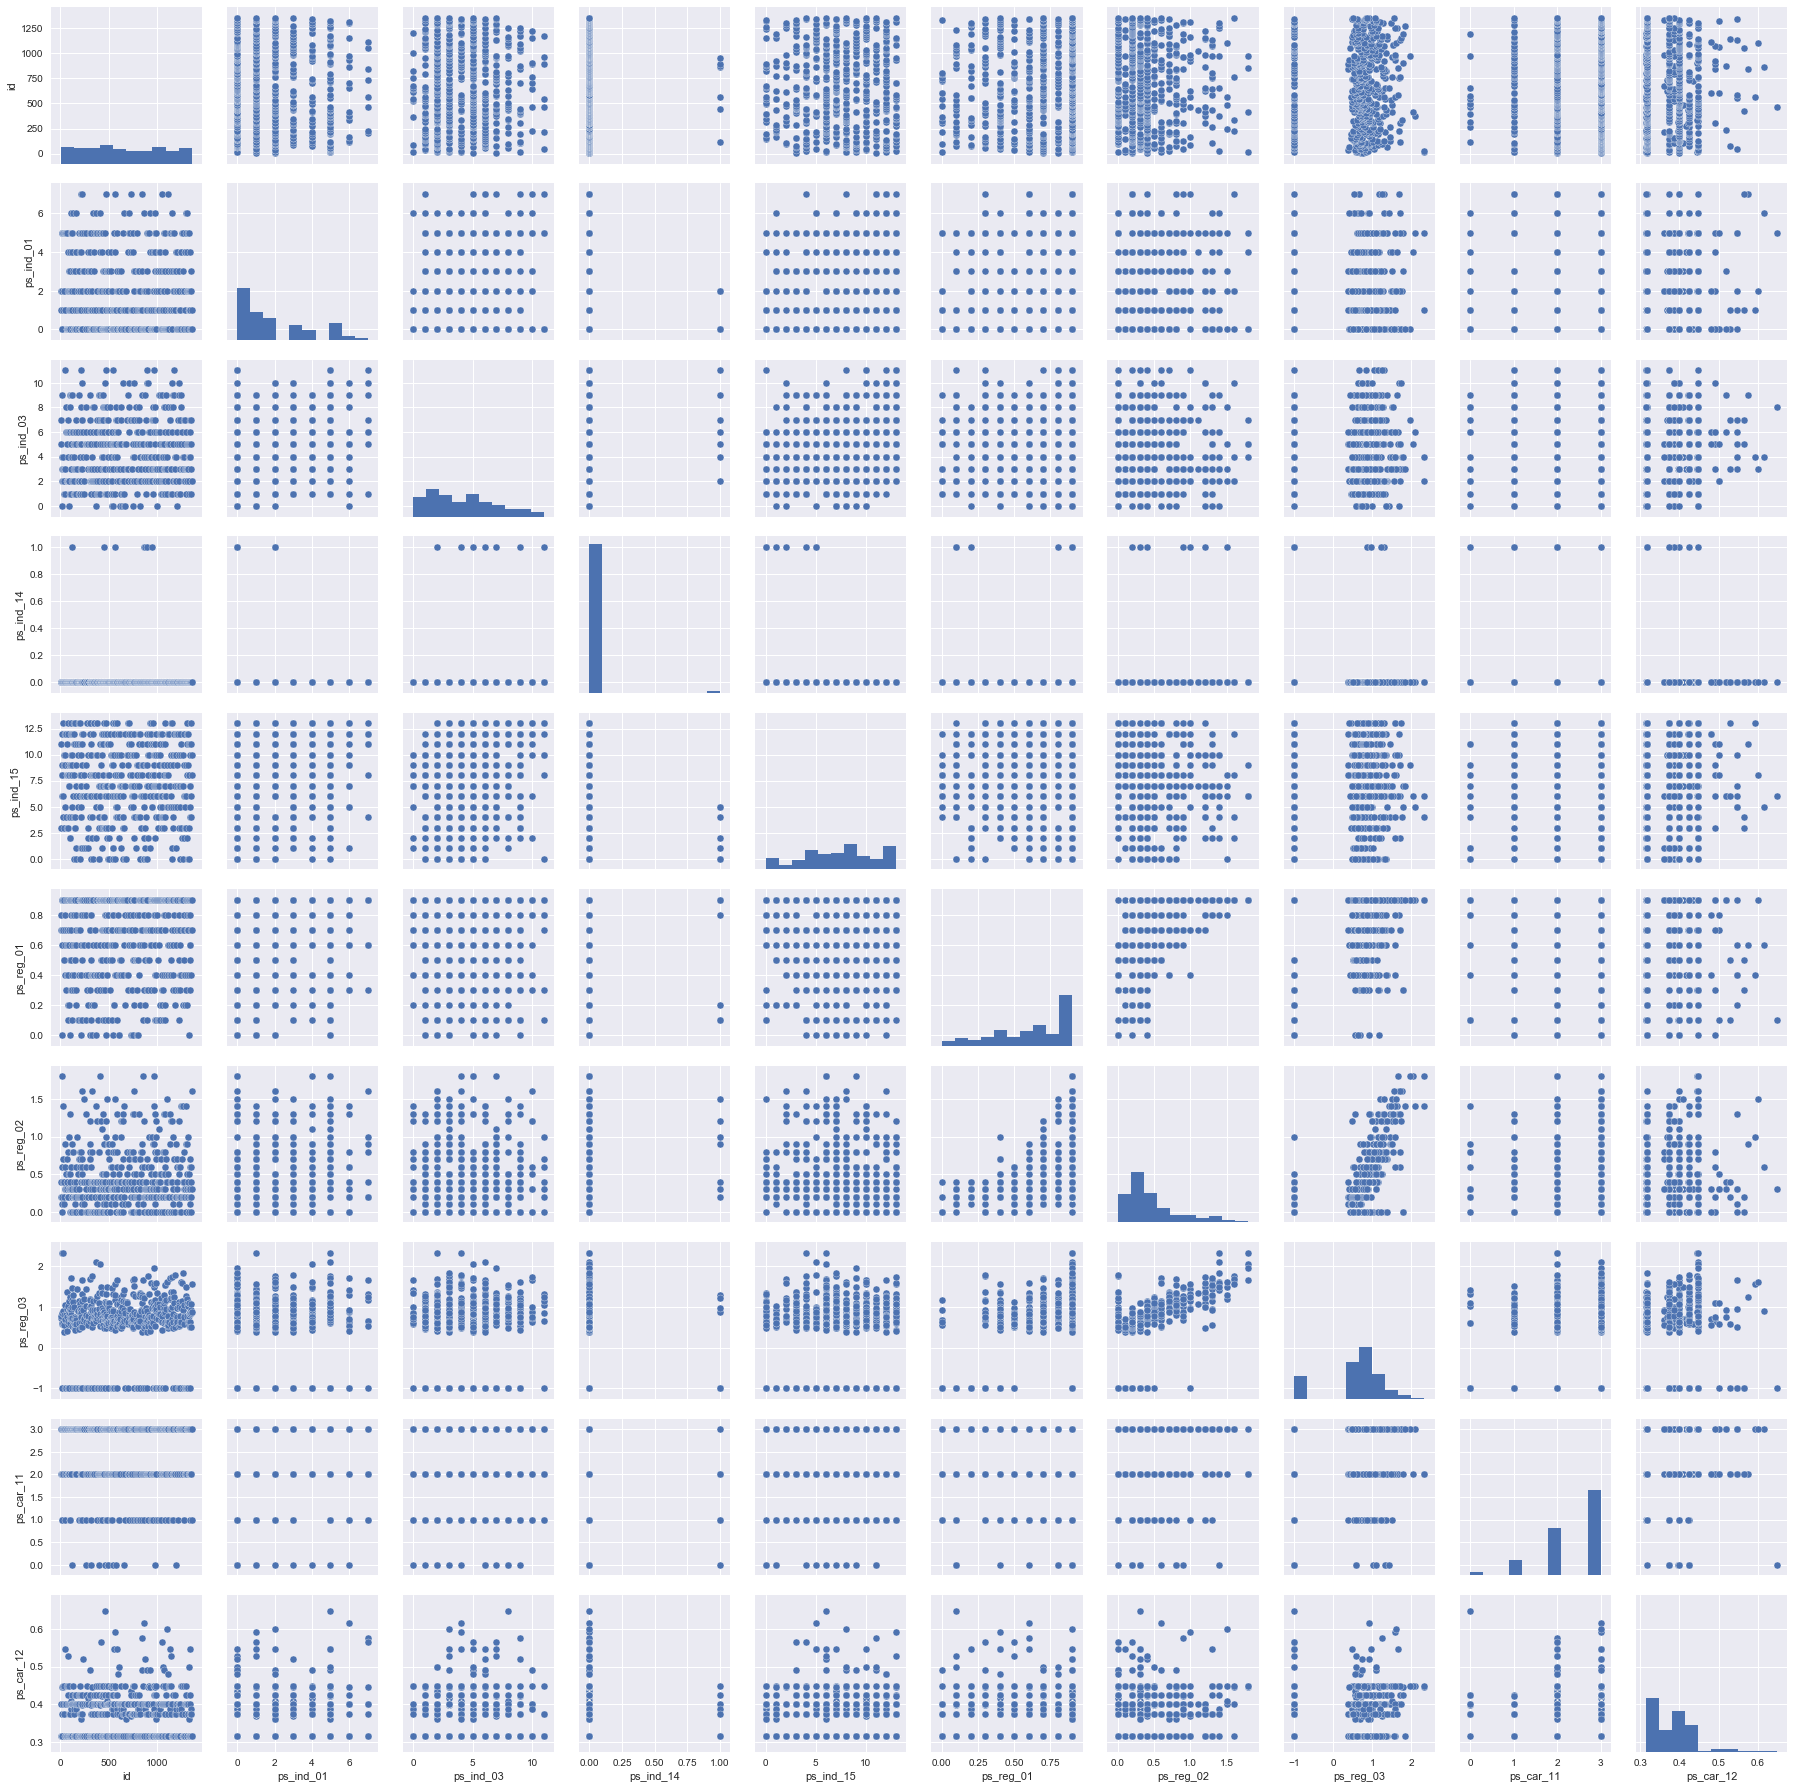

In [70]:
%matplotlib inline
## Data Exploration

sns.pairplot(norm[norm.columns[:10]][:500])



In [71]:
## ps_car_13 vs ps_car_15
## ps_calc_4 distribution

In [72]:
## Machine Learning
#from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def gini(actual, pred, cmpcol = 0, sortcol = 1):
     assert( len(actual) == len(pred) )
     all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
     all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
     totalLosses = all[:,0].sum()
     giniSum = all[:,0].cumsum().sum() / totalLosses
 
     giniSum -= (len(actual) + 1) / 2
     return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

#from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

X = pd.concat([bn, cat, norm], axis=1)

scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y)

clf = GradientBoostingClassifier(n_estimators=50, max_depth=3)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
print("Confusion matrix")
print(confusion_matrix(y_test, predicted))
print("Accuracy:", accuracy_score(y_test, predicted)*100, "%")
##

Confusion matrix
[[143425      1]
 [  5376      1]]
Accuracy: 96.3864975841 %


There is something interesting with the dataset. More than 96% of the data is classified as 0, while only 3% is actually 1s. Therefore, if the classifier just picked 0 for everything, then the accuracy would be 96%. We do not want our classifier to act this way. 
I shrunk the dataset to only have 50% 0 (randomly) and all of the 1s. Then I split them into training and testing sets.

In [73]:
#type(scaled_X)
X_ones = scaled_X[y==1, :]
y_ones = y[y==1]
#print(len(y_ones) - y_ones.count())
X_zeroes = scaled_X[y==0, :]
dat_ones = pd.DataFrame(X_ones)
dat_ones["target"] = [1] * len(dat_ones)
#print(len(dat_ones.target))
#print(len(tmp) - tmp.count())
#y_zeroes = y[y==0]
#print(len(y_zeroes) - y_zeroes.count())
#type(X_zeroes)
dat_f = pd.DataFrame(X_zeroes)
#dat_f = dat_f.append(y_zeroes, axis=1)
dat_f["target"] = np.zeros(len(dat_f))
#print(len(dat_f.target), len(y), len(dat_f.target) - dat_f.target.count())
#rnd = dat_f.sample(n=(len(dat_f)))
dat_ones = dat_ones.append(dat_f.sample(n=(len(dat_ones))))
#X_ones = X_ones.append(rnd.loc[:, rnd.columns != "target"])
#y_ones = y_ones.append(rnd.loc[:, "target"])
print("Number of 1 after rebuilding data:", sum(dat_ones.target == 1), "Percentage of dataset:", sum(dat_ones.target==1)/len(dat_ones.target)*100, "%")
print("Number of 0 after rebuilding data:", sum(dat_ones.target == 0), "Percentage of dataset:", sum(dat_ones.target==0)/len(dat_ones.target)*100, "%")

Number of 1 after rebuilding data: 21694 Percentage of dataset: 50.0 %
Number of 0 after rebuilding data: 21694 Percentage of dataset: 50.0 %


In [82]:
print("Reclassifing")
dat_ones.target
X_shrunk = dat_ones.loc[:, dat_ones.columns != "target"]
y_shrunk = dat_ones.target
scale = StandardScaler()
scaled_X = scale.fit_transform(X_shrunk)

X_train, X_test, y_train, y_test = train_test_split(X_shrunk, y_shrunk)

clf = GradientBoostingClassifier(n_estimators=50, max_depth=3)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
print("Confusion matrix")
print(confusion_matrix(y_test, predicted))
print("Accuracy of new set:", accuracy_score(y_test, predicted)*100, "%")
print("Gini for Gradient Boosting:", gini_normalized(y_test, predicted))

Reclassifing
Confusion matrix
[[3293 2117]
 [2271 3166]]
Accuracy of new set: 59.5464183645 %
Gini for Random Forest: 0.19515016062


So this is the actual accuracy for Gradient boosting, not the 96% we saw in the uneven dataset.

In [75]:
from sklearn.ensemble import RandomForestClassifier
print("Predicting from RandomForestClassifier")
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train, y_train)
predicted_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, predicted_rfc))
print("Accuracy of new set as RFC:", accuracy_score(y_test, predicted_rfc)*100, "%")
print("Gini for Random Forest:", gini_normalized(y_test, predicted_rfc))


Predicting from RandomForestClassifier
[[3197 2218]
 [2156 3276]]
Accuracy of new set as RFC: 59.6754863096 %
Gini for Random Forest: 0.206245197911


In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X_shrunk, y_shrunk, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

gnb = GaussianNB()
dtc = tree.DecisionTreeClassifier(max_depth=3)
rndf = RandomForestClassifier()

gnb.fit(X_train, y_train)
gnbpred = gnb.predict(X_val)
print ("GNB Classifier Accuracy", accuracy_score(y_val, gnbpred)*100, "%")
print("Gini for GNB:", gini_normalized(y_val, gnbpred))
dtc = dtc.fit(X_train, y_train)
dtcpred = dtc.predict(X_val)
print ("Decision Tree Classifier Accuracy", accuracy_score(y_val, dtcpred)*100, "%")
print("Gini for Decision Tree:", gini_normalized(y_val, dtcpred))
rndf.fit(X_train, y_train)
rndfpred = rndf.predict(X_val)
#print ("Random Forest Accuracy", accuracy_score(y_val, rndfpred)*100, "%")
#print("Gini for Random Forest:", gini_normalized(y_val, rndfpred))


X_b = np.empty([len(y_val), 3])
X_b[:, 0] = gnbpred
X_b[:, 1] = dtcpred
X_b[:, 2] = rndfpred
y_b = y_val
rfcA = RandomForestClassifier()
rfcA.fit(X_b, y_b)

pred = np.empty([len(y_test), 3])
l = [gnb,dtc,rndf]
tmp = 0
for i in l:
    pred[:,tmp] = i.predict(X_test)
    tmp = tmp+1
predictions = rfcA.predict(pred)
print ("MYvoting classifier Accuracy", accuracy_score(y_test, predictions)*100, "%")
print("Gini for MYvoting classifier:", gini_normalized(y_test, predictions))


GNB Classifier Accuracy 55.862863728 %
Gini for GNB: 0.11079793181
Decision Tree Classifier Accuracy 56.0933448574 %
Gini for Decision Tree: 0.114577610117
MYvoting classifier Accuracy 56.6259506799 %
Gini for MYvoting classifier: 0.115542508783


None of the classifiers are doing very well.

In [77]:
vote = VotingClassifier(estimators=[('gnb', gnb),('rf', rndf), ('dtc', dtc)], voting='hard')
vote.fit(X_train, y_train)
votepred = vote.predict(X_test)
print ("\nVoting Classifier", accuracy_score(y_test, votepred)*100, "%")
print("Gini for Voting Classifier:", gini_normalized(y_test, votepred))


Voting Classifier 56.9486056695 %
Gini for Voting Classifier: 0.122262067685


The voting classifier did not do well either. Going to try to use a blender to help make decisions.

In [78]:
from sklearn.linear_model import LogisticRegression

class StackingRegressor:
    def __init__(self, l_estimators):
        self.l_estimators = l_estimators
        self.models = []
        self.blender = None
        
    def fit(self, X, y):
        # Make a matrix of predictions
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        for i in self.l_estimators:
            #bag_clf = BaggingRegressor(LogisticRegression(), n_estimators=50, max_samples=int(len(y)*.75), bootstrap=True, n_jobs=-1)
            #bag_clf.fit(X, y)
            model = i.fit(X_train,y_train)
            self.models.append(model)
        predictions = np.empty([len(y_test), len(self.l_estimators) + 1])
        tmp = 0
        for i in self.models:
            predictions[:,tmp] = i.predict(X_test)
            tmp = tmp + 1
        predictions[:,len(self.l_estimators)] = y_test
        rfcA = RandomForestClassifier()
        #logr = LogisticRegression()
        Y = y_test
        x = predictions[:,0:tmp]
        rfcA.fit(x, Y)
        self.blender = rfcA
        
    def predict(self, X):
        predictions = np.empty([len(X), len(self.l_estimators)])
        tmp = 0
        for i in self.models:
            predictions[:,tmp] = i.predict(X)
            tmp = tmp + 1
        return self.blender.predict(predictions)
    
    def score(self, X, y):
        s = StackingRegressor(l_estimators = self.l_estimators)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
        s.fit(X_train,y_train)
        pred = s.predict(X_test)
        return accuracy_score(y_test, pred)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_shrunk, y_shrunk)
#stacker = StackingRegressor(l_estimators=(gnb),(rndf),(dtc))
gnb = GaussianNB()
dtc = tree.DecisionTreeClassifier(max_depth=3)
rndf = RandomForestClassifier()
stacker = StackingRegressor(l_estimators=[gnb,dtc,rndf])
stacker.fit(X_train, y_train)
predict = stacker.predict(X_test)

print ("Stacking Accuracy:", accuracy_score(y_test, predict) * 100, "%")


Stacking Accuracy: 56.3289388771 %


In [81]:
print("Gini for blender:", gini_normalized(y_test, predict))

Gini for blender: 0.128303825548
